In [1]:
import SigVarGen as svg
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
domain = 'Arduino Board'

fs = max(svg.EMBEDDED_DEVICE_RANGES[domain]['frequency'])*2  # sampling rate in Hz
duration = 0.1  # seconds
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples, endpoint=False)

n_sinusoids = random.randint(20, 50)

drop = False

In [3]:
signal_range, interrupt_range = svg.generate_device_parameters(svg.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratios=[0.5, 0.5])

In [4]:
amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

In [5]:
base_wave, sinusoids_params = svg.generate_signal(t, n_sinusoids, amplitude_range, frequency_range)

In [6]:
np.min(base_wave)

0.0

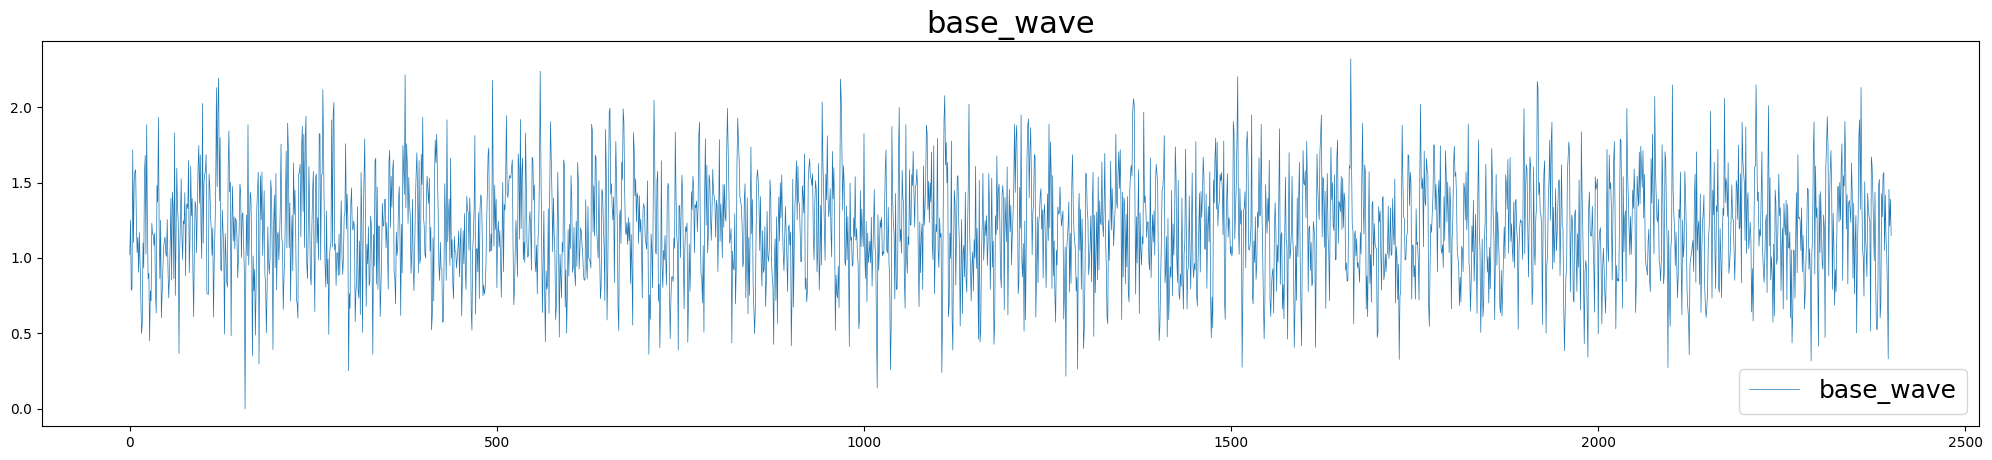

In [7]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=0.5)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [8]:
var_wave = svg.add_interrupt_bursts(t, base_wave.copy(), domain, {'Arduino Board': {'amplitude': (0, 3), 'frequency': (0, 10000.0)}}, device_min=0, device_max=4, temp=0,
    start_idx=0, end_idx=0, n_small_interrupts=20, non_overlap=False, small_duration_ratio_range=(0.001,0.009))

(2179, 2184)
(1713, 1728)
(880, 900)
(1393, 1410)
(802, 816)
(1026, 1035)
(545, 559)
(1941, 1952)
(1590, 1602)
(1874, 1877)
(2, 8)
(903, 924)
(581, 591)
(2317, 2329)
(1732, 1738)
(2149, 2159)
(94, 99)
(1525, 1531)
(238, 247)
(1760, 1768)


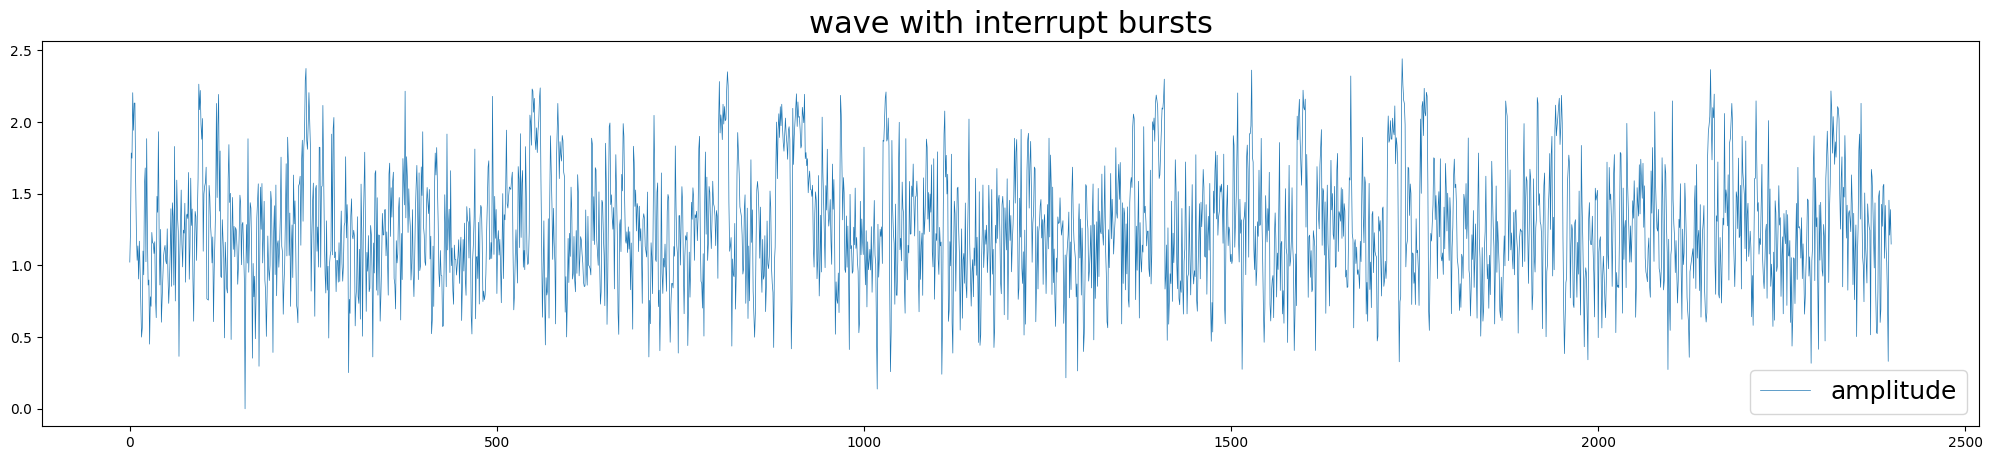

In [9]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(var_wave)), var_wave, label='amplitude', linewidth=0.5)
plt.title(f"wave with interrupt bursts", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [13]:
wave, interrupt_params = svg.add_interrupt_with_params(t, var_wave.copy(), domain, signal_range, interrupt_range, 
                                            0, duration_ratio=0.1, disperse=True, drop=drop, complex_iter=2, shrink_complex=True, blend_factor=0.5)

(232, 472)


In [14]:
max(wave)

3.2838015049206914

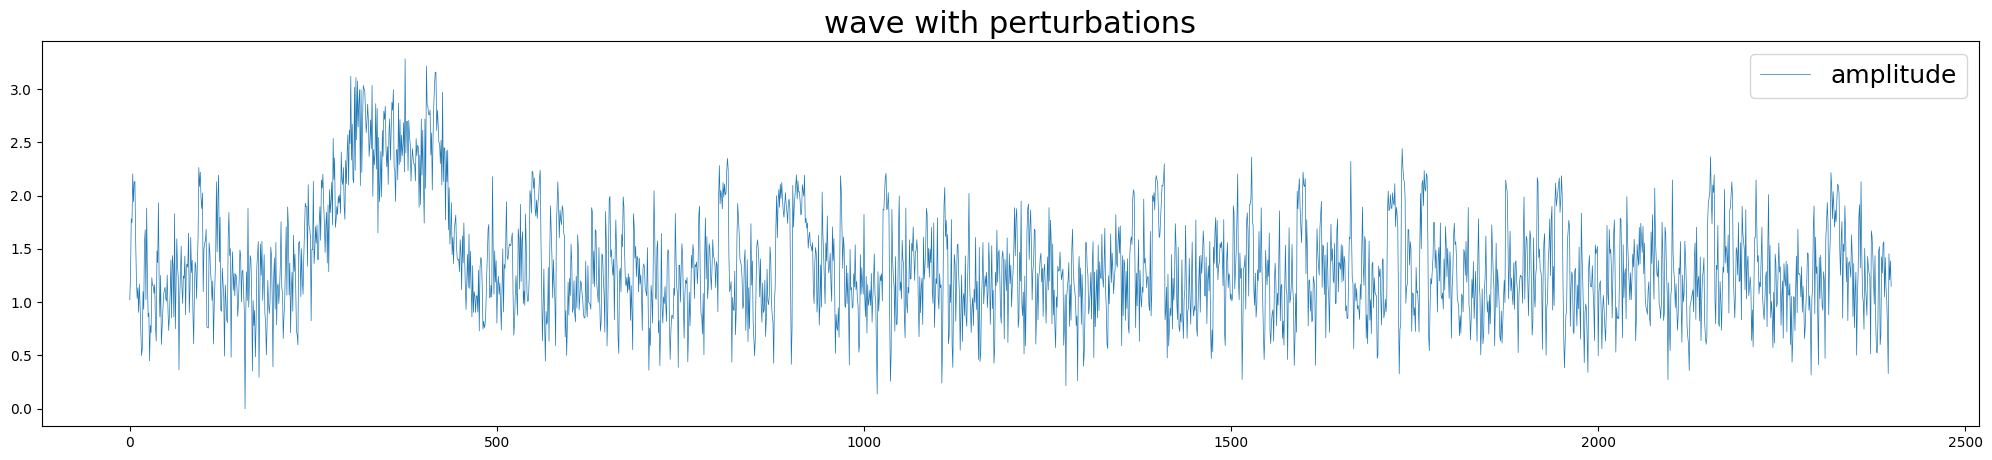

In [15]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='amplitude', linewidth=0.5)
plt.title(f"wave with perturbations", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [16]:
domain = 'Cameras'

fs = max(svg.EMBEDDED_DEVICE_RANGES[domain]['frequency'])*2  # sampling rate in Hz
duration = 2.5  # seconds
n_samples = int(fs * duration)
t = np.linspace(0, duration, n_samples, endpoint=False)

n_sinusoids = 10 #random.randint(20, 50)

drop = True

In [17]:
interrupt_range_high, signal_range, interrupt_range_low = svg.generate_device_parameters(svg.EMBEDDED_DEVICE_RANGES, drop=drop, frequency_follows_amplitude=False, split_ratios=[0.33, 0.34, 0.33])

amplitude_range = signal_range[domain]['amplitude']
frequency_range = signal_range[domain]['frequency']

frequency_subrange_key = 0 #random.choice(list(frequency_range.keys())) - if multiple frequency ranges per domain

base_frequency_range = (frequency_range[0], frequency_range[0] + (frequency_range[1] - frequency_range[0]) * 1)

In [18]:
base_wave, sinusoids_params = svg.generate_signal(t, n_sinusoids, amplitude_range, base_frequency_range)

In [19]:
np.mean(base_wave)

0.48324999999999996

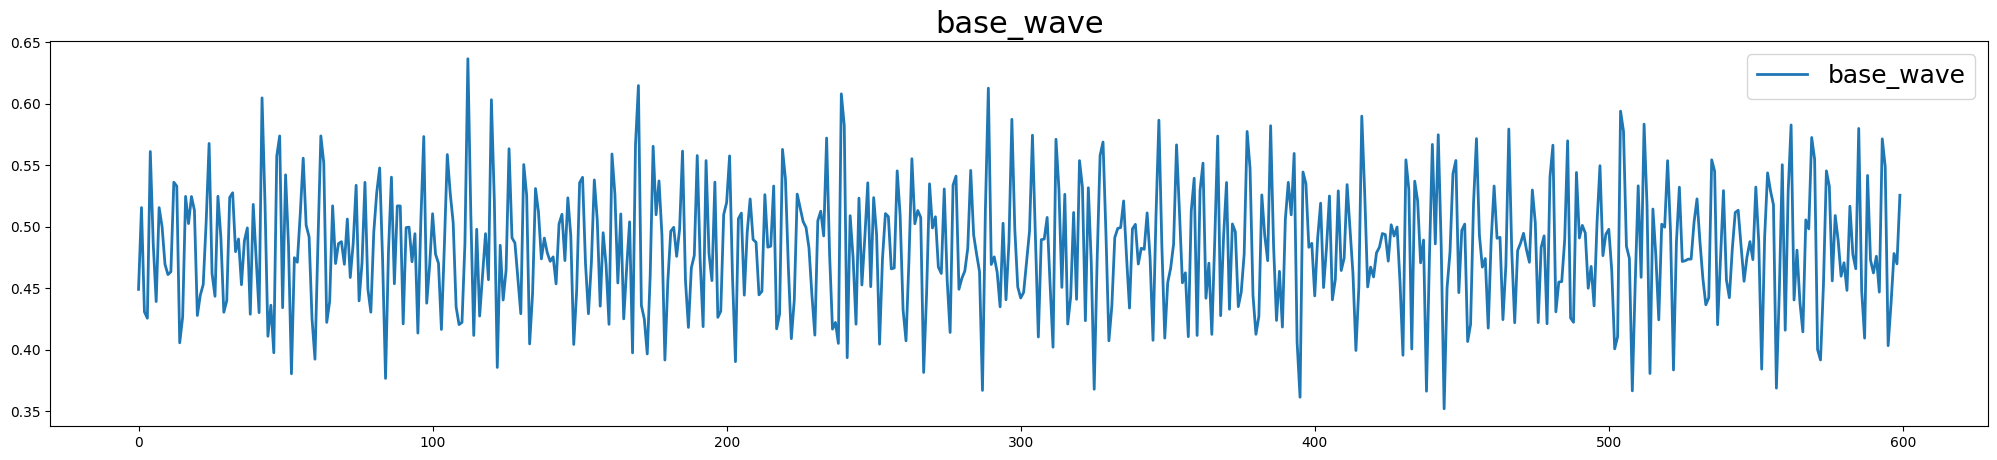

In [20]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(base_wave)), base_wave, label='base_wave', linewidth=2)
plt.title(f"base_wave", fontsize=22)
plt.legend(fontsize=18)
plt.show()

In [27]:
wave, interrupt_params = svg.add_interrupt_with_params(t, base_wave.copy(), domain, signal_range, interrupt_range_low, 
                                            0, duration_ratio=0.1, disperse=True, drop=drop, complex_iter=0)

(312, 372)
(39, 90)
(419, 470)


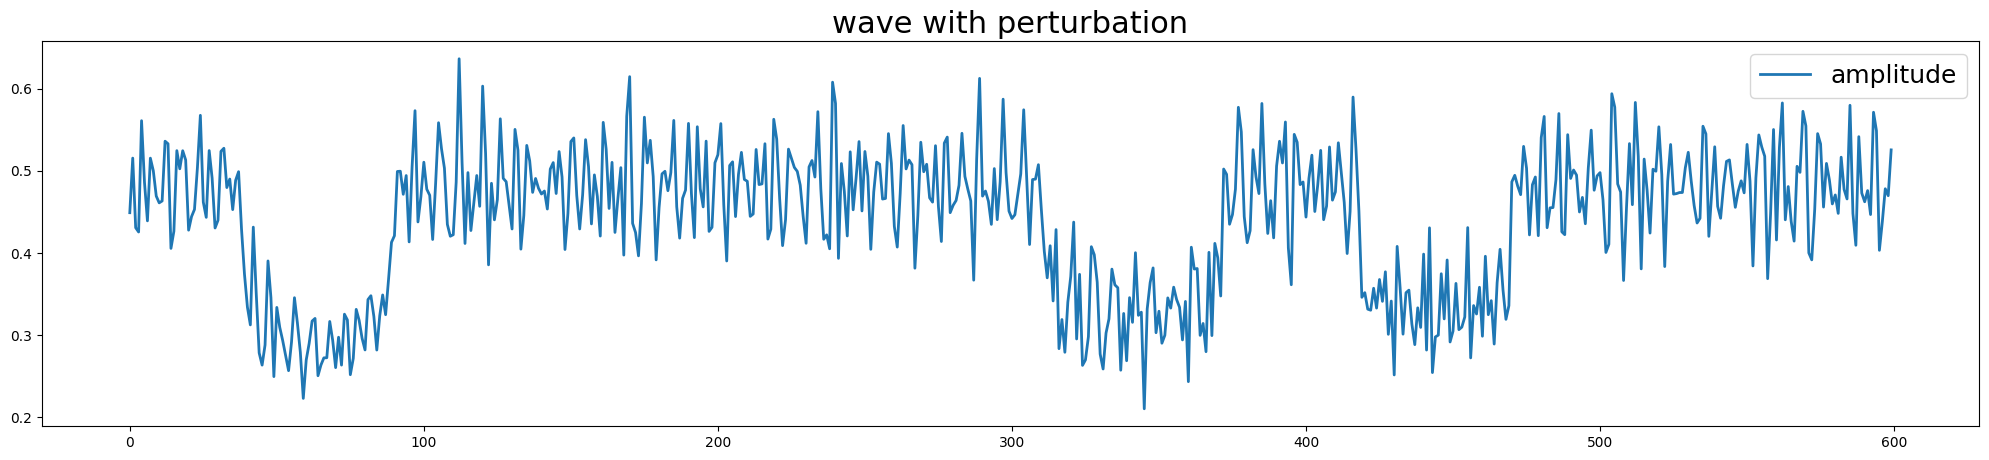

In [28]:
plt.figure(figsize=(25, 5))
plt.plot(range(len(wave)), wave, label='amplitude', linewidth=2)
plt.title(f"wave with perturbation", fontsize=22)
plt.legend(fontsize=18)
plt.show()